In [1]:
from VideoStabilizer import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils.feature.factories as kp_factory

In [2]:
video_path = 'demo/demo.mp4'

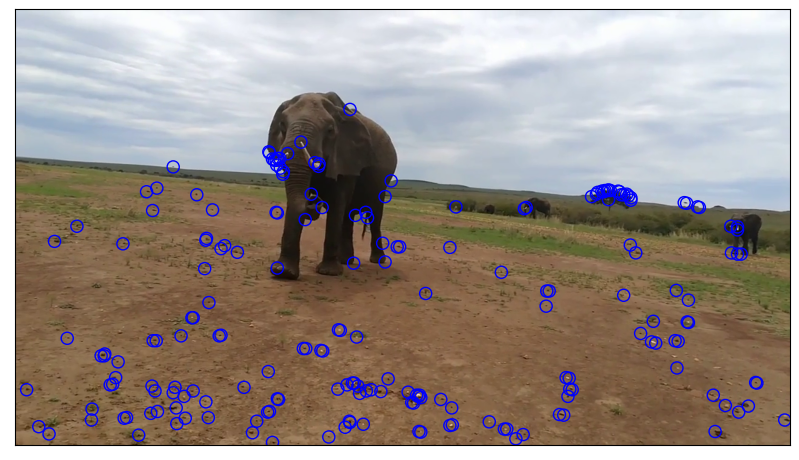

In [3]:
video = Video(video_path)
kp_detector = kp_factory.FeatureDetector_create('GFTT', maxCorners=200, qualityLevel=0.01, minDistance=0.0)

for _ in range(100):
    video.read_frame()

_, frame_0 = video.read_frame()
frame_0_gray = cv2.cvtColor(frame_0, cv2.COLOR_BGR2GRAY)
frame_0_kps = kp_detector.detect(frame_0_gray)
frame_0_kps = np.array([kp.pt for kp in frame_0_kps], dtype=np.float32).reshape(-1, 1, 2)

fig, ax = plt.subplots(figsize=(10, 8))
radius = 10

for cent in frame_0_kps:
    circle = plt.Circle(cent[0], radius, fill=False, color='blue')
    ax.add_artist(circle)

plt.imshow(frame_0[..., ::-1])


plt.xticks([])
plt.yticks([])
plt.show()

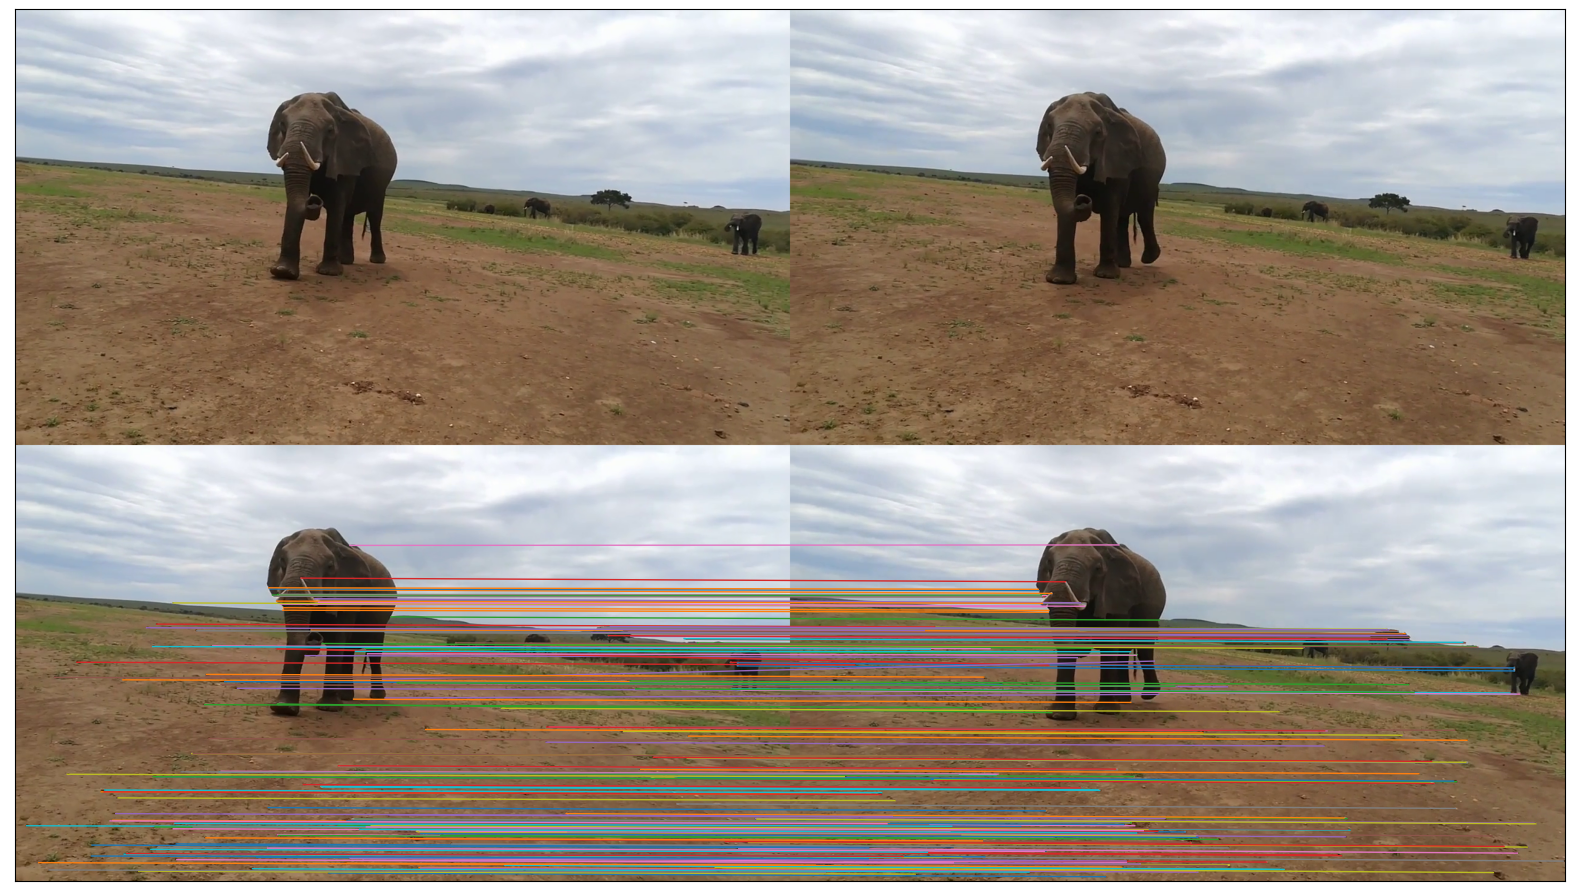

In [4]:
for _ in range(10):
    video.read_frame()

_, frame_1 = video.read_frame()
frame_1_gray = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)
optical_flow = cv2.calcOpticalFlowPyrLK(frame_0_gray, frame_1_gray, frame_0_kps, None)
frame_1_kps, status, _ = optical_flow

frame_0_matched = frame_0_kps[status==1]
frame_1_matched = frame_1_kps[status==1]

frame_0_matched = frame_0_matched + np.array([0, frame_1.shape[0]])
frame_1_matched = frame_1_matched + np.array([frame_1.shape[1], frame_1.shape[0]])

plt.figure(figsize=(20, 16))
plt.imshow(np.concatenate([
    np.concatenate([frame_0[..., ::-1], frame_1[..., ::-1]], axis=1),
    np.concatenate([frame_0[..., ::-1], frame_1[..., ::-1]], axis=1)
]))

for start, end in zip(frame_0_matched, frame_1_matched):
    x1, y1 = start 
    x2, y2 = end 
    plt.plot([x1, x2], [y1, y2], linewidth=1)

plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
vistab = VideoStabilizer()
vistab.stabilize(output_path=None)

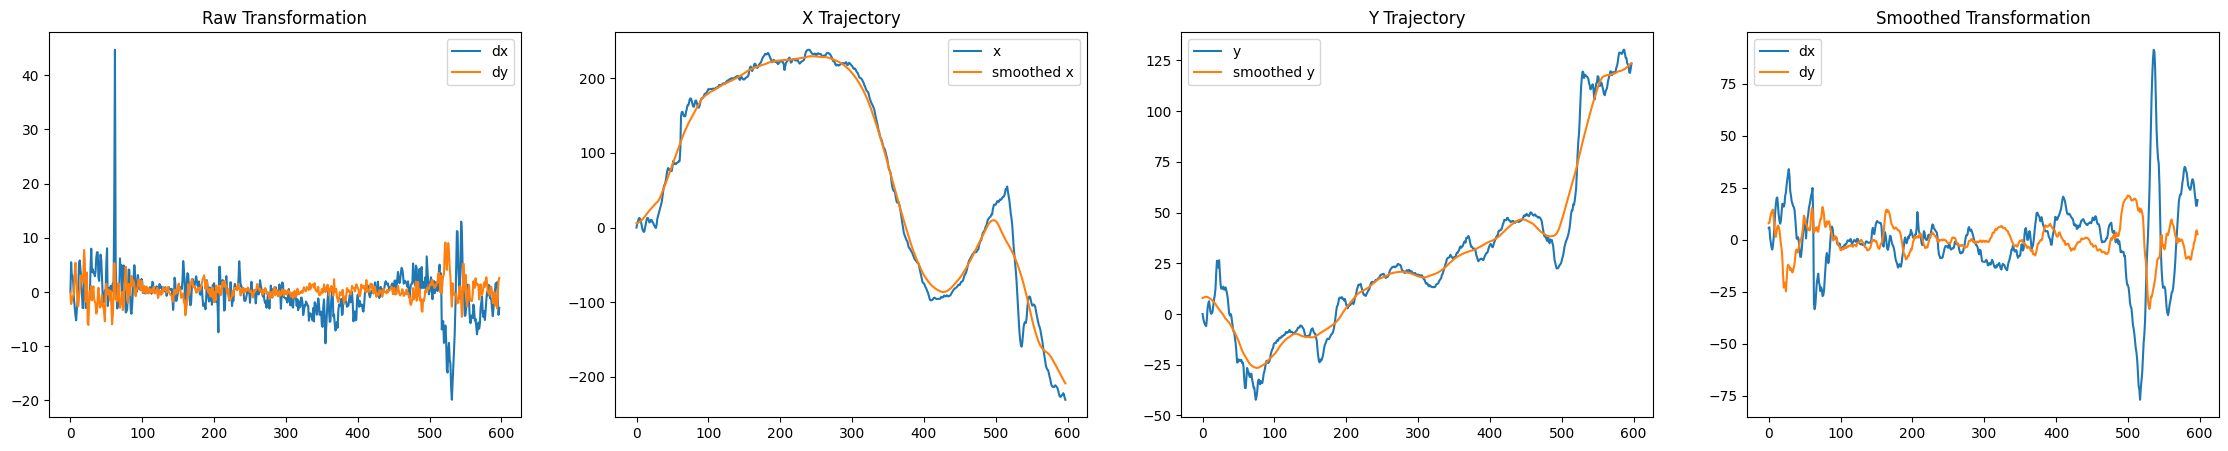

In [6]:
plt.figure(figsize=(28, 5))

plt.subplot(1, 4, 1)

raw_trans = vistab.raw_transforms
dx = raw_trans[:, 0]
dy = raw_trans[:, 1]
rng = np.arange(len(dx))
plt.title('Raw Transformation')
plt.plot(rng, dx, label='dx')
plt.plot(rng, dy, label='dy')
plt.legend()


plt.subplot(1, 4, 2)

trajectory = vistab.trajectory
smoothed_trajectory = vistab.smoothed_trajectory
sumx = trajectory[:, 0]
smoothedx = smoothed_trajectory[:, 0]
plt.title('X Trajectory')
plt.plot(rng, sumx, label='x')
plt.plot(rng, smoothedx, label='smoothed x')
plt.legend()


plt.subplot(1, 4, 3)

sumx = trajectory[:, 1]
smoothedx = smoothed_trajectory[:, 1]
plt.title('Y Trajectory')
plt.plot(rng, sumx, label='y')
plt.plot(rng, smoothedx, label='smoothed y')
plt.legend()


plt.subplot(1, 4, 4)

trans = vistab.transforms
dx = trans[:, 0]
dy = trans[:, 1]
rng = np.arange(len(dx))
plt.title('Smoothed Transformation')
plt.plot(rng, dx, label='dx')
plt.plot(rng, dy, label='dy')
plt.legend()

plt.show()